## Initial EDA

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
sns.set_style("dark")
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import pickle
import re


In [274]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
train.head(5)
combined_data = pd.concat((train, test),ignore_index=True)
combined_data.head(5)

/Users/hellothere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [79]:
#train.groupby(['Functional']).count()
#train['MiscVal']

In [54]:
#info = train.info()
# group= train.columns.to_series().groupby(train.dtypes).groups
# group
#train.columns.to_series().groupby(train.dtypes)
#print(train.dtypes.)
train2 = train.copy()
#idx = train2.dtypes.to_dict()
idx = train2.dtypes.apply(lambda x: x.name).to_dict()
idx
#train2['MSSubClass'] = train2['MSSubClass'].astype(str)
#idx[]

#ids = [col for col, types in idx.items() if types == 'float64']

# train2['LotFrontage'] = train2['LotFrontage'].astype('int64')
# train2['MasVnrArea'] = train2['MasVnrArea'].astype('int64')

# Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


{'MSSubClass': 'int64',
 'MSZoning': 'object',
 'LotFrontage': 'float64',
 'LotArea': 'int64',
 'Street': 'object',
 'Alley': 'object',
 'LotShape': 'object',
 'LandContour': 'object',
 'Utilities': 'object',
 'LotConfig': 'object',
 'LandSlope': 'object',
 'Neighborhood': 'object',
 'Condition1': 'object',
 'Condition2': 'object',
 'BldgType': 'object',
 'HouseStyle': 'object',
 'OverallQual': 'int64',
 'OverallCond': 'int64',
 'YearBuilt': 'int64',
 'YearRemodAdd': 'int64',
 'RoofStyle': 'object',
 'RoofMatl': 'object',
 'Exterior1st': 'object',
 'Exterior2nd': 'object',
 'MasVnrType': 'object',
 'MasVnrArea': 'float64',
 'ExterQual': 'object',
 'ExterCond': 'object',
 'Foundation': 'object',
 'BsmtQual': 'object',
 'BsmtCond': 'object',
 'BsmtExposure': 'object',
 'BsmtFinType1': 'object',
 'BsmtFinSF1': 'int64',
 'BsmtFinType2': 'object',
 'BsmtFinSF2': 'int64',
 'BsmtUnfSF': 'int64',
 'TotalBsmtSF': 'int64',
 'Heating': 'object',
 'HeatingQC': 'object',
 'CentralAir': 'object',
 '

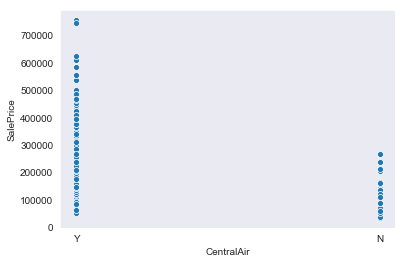

In [139]:
train['LowQualFinSF'][train['LowQualFinSF'] != 0 ]
sns.scatterplot(train['CentralAir'],train['SalePrice'])

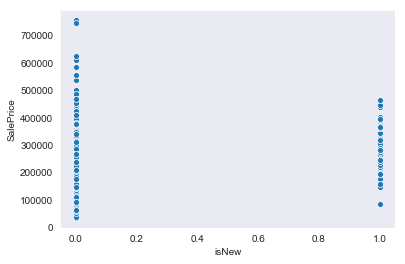

In [141]:
train['isNew'] = np.where(train['YrSold'] == train['YearBuilt'], 1, 0)
sns.scatterplot(train['isNew'],train['SalePrice'])

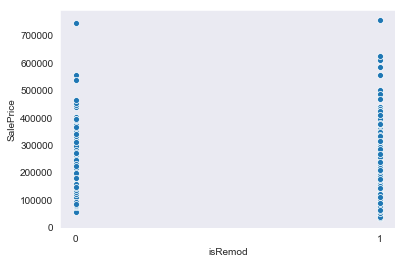

In [143]:
train['isRemod'] = np.where(train['YearRemodAdd'] == train['YearBuilt'], '0', '1')
sns.scatterplot(train['isRemod'],train['SalePrice'])

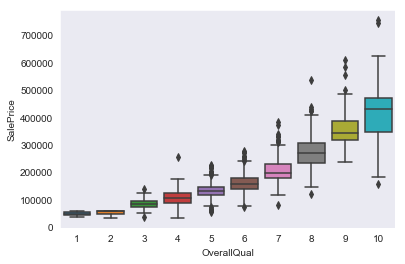

In [160]:
 sns.boxplot(x='OverallQual', y="SalePrice", data=train)

/Users/hellothere/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


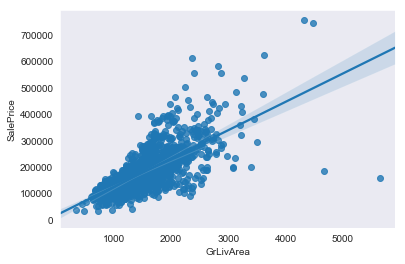

In [161]:
sns.regplot(x='GrLivArea', y="SalePrice", data=train)

In [ ]:
numerical_with_nan = get_columns_with_nan(X[get_numeric_columns(X)])

In [156]:
# Set initial feature 
train_feature = train.columns[:-1]
train_feature
train.columns
#train[train_feature].head(5)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [100]:
train[['LotFrontage','LotArea']]

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260
5,85.0,14115
6,75.0,10084
7,NaN,10382
8,51.0,6120
9,50.0,7420


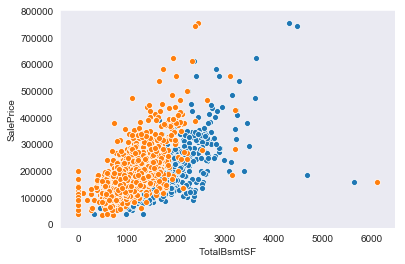

In [152]:
train[['GrLivArea','TotalBsmtSF']]
sns.scatterplot(train['GrLivArea'], train['SalePrice'])
sns.scatterplot(train['TotalBsmtSF'], train['SalePrice'])

# sns.scatterplot(train['GrLivArea']+train['TotalBsmtSF'], train['SalePrice'])
# #sns.scatterplot(train['TotalBsmtSF'], train['SalePrice'])


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isRemod,ishotMonth,isNew
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,1,2007,WD,Normal,755000,1,1,0
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,7,2007,WD,Abnorml,745000,0,0,0


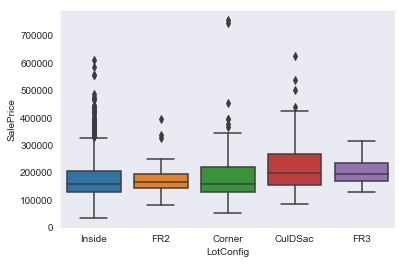

In [165]:
sns.boxplot(train['LotConfig'], train['SalePrice'])
train[(train['LotConfig'] == 'Corner' ) & (train['SalePrice']  > 700000 )]
# 691 , 1182


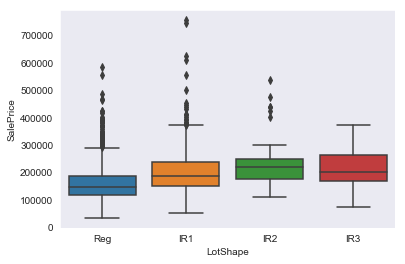

In [166]:
sns.boxplot(train['LotShape'], train['SalePrice'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isRemod
769,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,...,NaN,NaN,NaN,0,6,2010,WD,Normal,538000,0


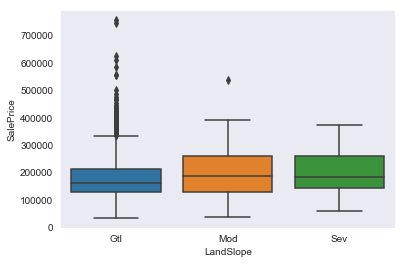

In [110]:
sns.boxplot(train['LandSlope'], train['SalePrice'])
train[(train['LandSlope'] == 'Mod' ) & (train['SalePrice']  > 500000 )] # 769
# 691 , 1182

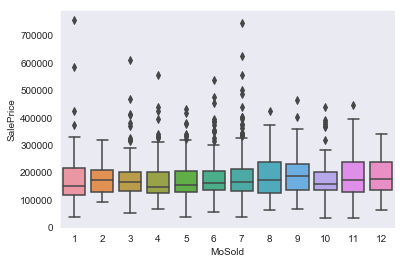

In [164]:
#sns.boxplot(train['isRemod'], train['SalePrice'])
#sns.boxplot(train['OverallQual'], train['SalePrice'])
sns.boxplot(train['MoSold'], train['SalePrice'])

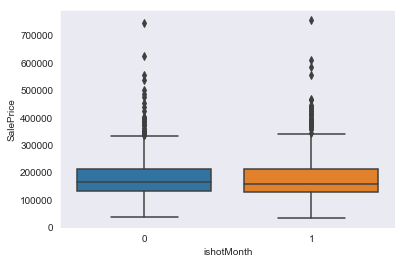

In [131]:
train.groupby(['MoSold']).size()
train['ishotMonth'] = np.where( ( train['MoSold'] == 6 ) | ( train['MoSold'] == 7 ) | ( train['MoSold'] == 8 ), '0', '1')
sns.boxplot(train['ishotMonth'], train['SalePrice'])

In [61]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/hellothere/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


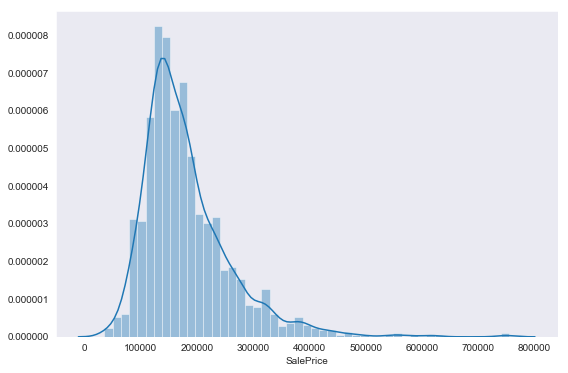

In [62]:
plt.figure(figsize=(9, 6))
sns.distplot(y_pred)    

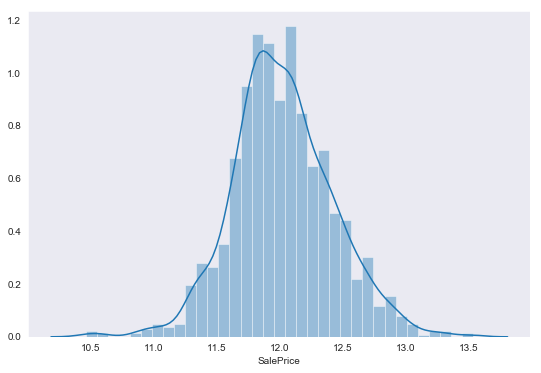

In [41]:
plt.figure(figsize=(9, 6))
sns.distplot(np.log1p(y_pred));

In [65]:
y_train_values = np.log1p(train["SalePrice"]).values

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

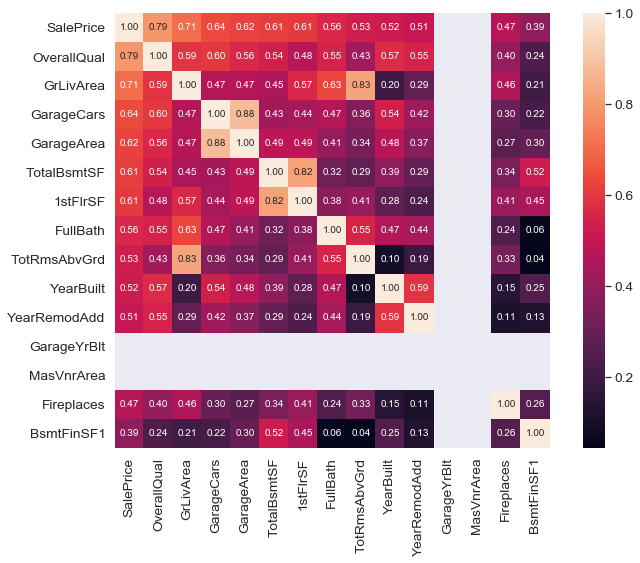

In [70]:
## check correlation 
## zoomed heatmap style
corrmat = train.corr()
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


## GarageCars & GagageArea has Multicollinearity so take 1 feature 

In [224]:
df = pd.DataFrame({'A': [1, 2, 1, 2, 1, 2, 3]})
df.mode()

,A
0,1
1,2


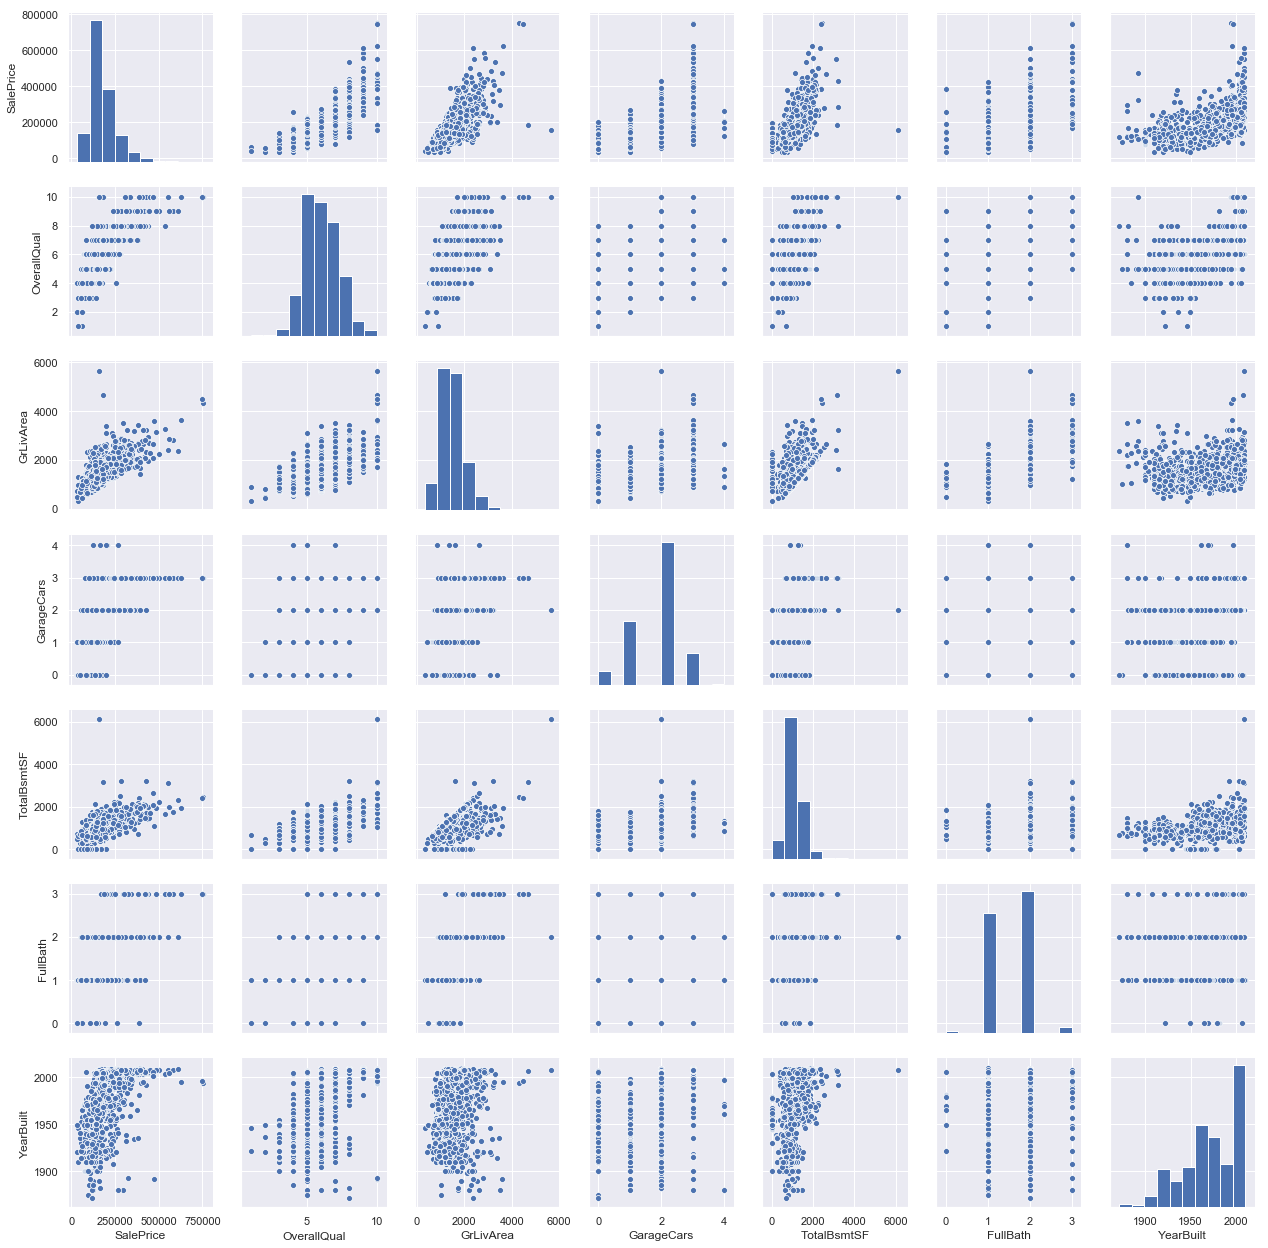

In [73]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

## Missing 

In [97]:
#missing data
combined_data = pd.concat((train, test))

total = combined_data.isnull().sum().sort_values(ascending=False)
percent = (combined_data.isnull().sum()/combined_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
features_to_drop = missing_data[missing_data['Percent'] > 0.4].index
features_to_drop
    
# features_to_drop = features_to_drop.union(['GarageArea'])
# features_to_drop
#print(missing_data.head(5).index)

/Users/hellothere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'SalePrice', 'FireplaceQu'], dtype='object')

## Time series 

##  house Size relationship

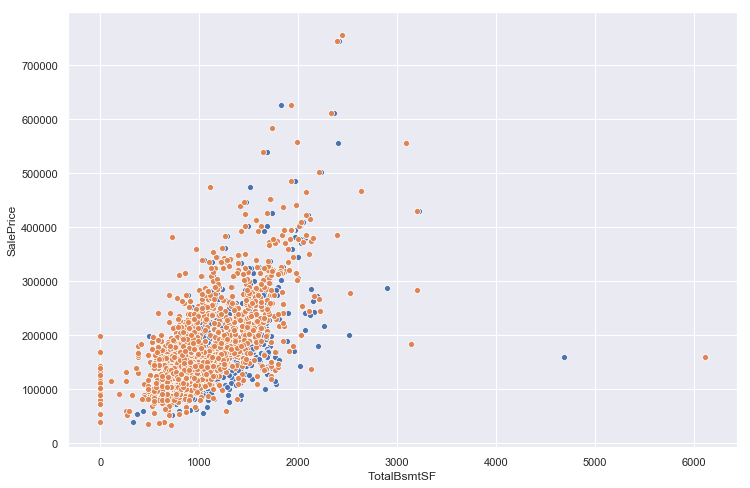

In [207]:
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
    
df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']]
#sum_of_flr = df['1stFlrSF'] + df['2ndFlrSF']
#mydata['TotalBsmtSF'] 
# sum_of_all_flr = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
# #sns.scatterplot(sum_of_flr,df['SalePrice'])
# #corr
# sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'])
#sns.scatterplot(sum_of_flr,df['SalePrice'])
#sns.scatterplot(sum_of_all_flr,df['SalePrice'])


df['is2nd'] = (df['2ndFlrSF']> 0) * 1 
#df['is2nd']

#sns.scatterplot(df['is2nd'],df['SalePrice']) ## 2층 여부는 상관없는듯 

sns.scatterplot(df['1stFlrSF'],df['SalePrice'])
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'])

In [219]:
#df.groupby('FireplaceQu').agg('count').size()
df.groupby(['FireplaceQu']).size()

FireplaceQu
Ex     24
Fa     33
Gd    380
Po     20
TA    313
dtype: int64

In [39]:
for col in ord_df.columns:
    if ord_df[col].dtype == 'float64':
        ord_df[col] = ord_df[col].apply(lambda x: 0 if pd.isnull(x) else x)
        ord_df[col] = ord_df[col].apply(int)

In [44]:
preserved_mapper_MoSold = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
ord_df['MoSold'] = ord_df.MoSold.replace(preserved_mapper_MoSold)

In [47]:
 X.to_csv('./data/transformed_train.csv')

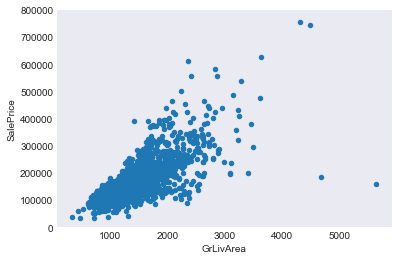

In [13]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


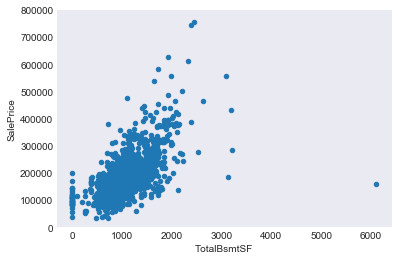

In [15]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


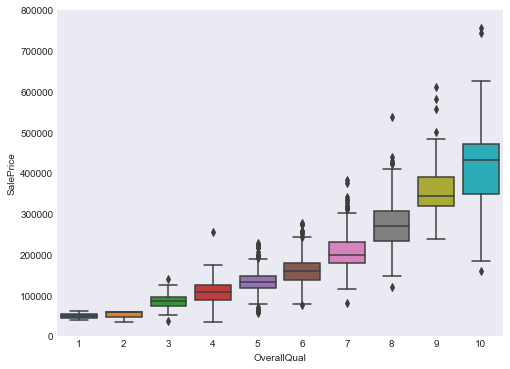

In [17]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


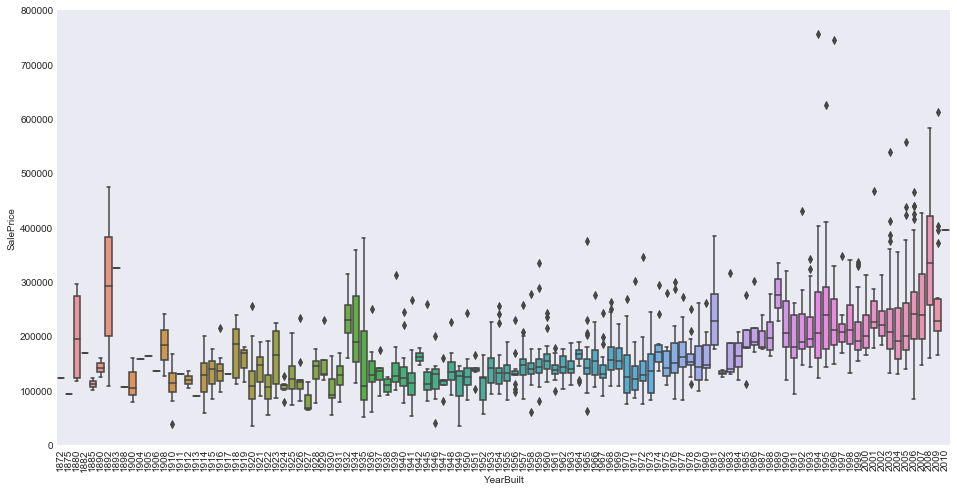

In [19]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

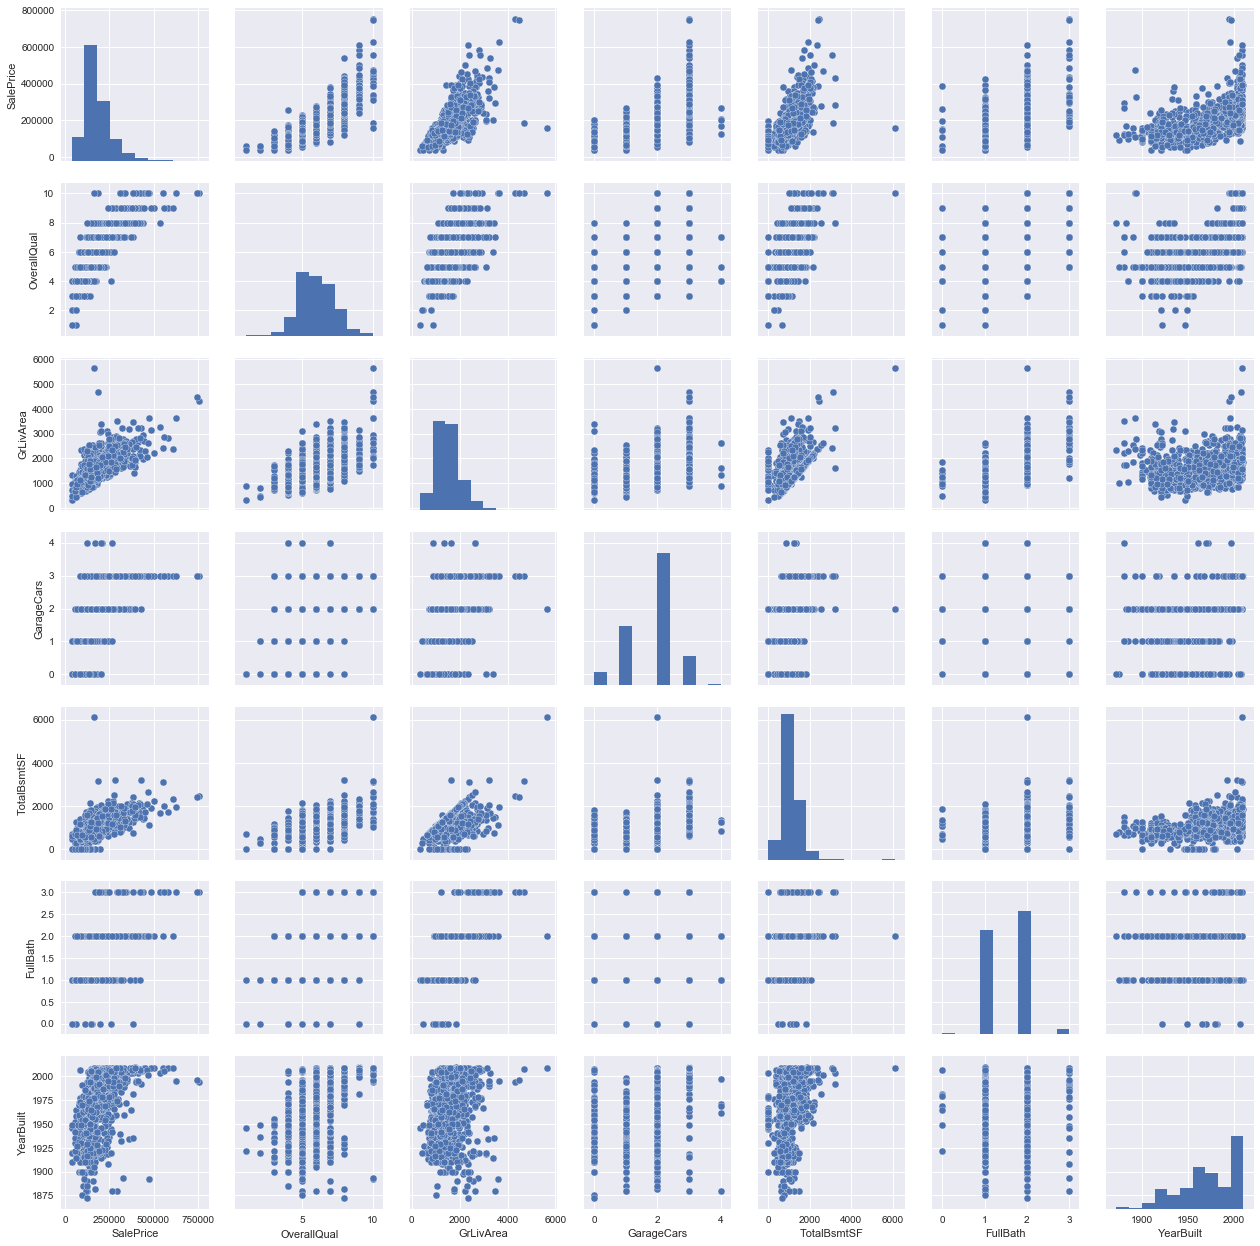

In [25]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [ ]:
features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")

In [174]:
features = pd.concat([train , test]).reset_index(drop=True)
features.shape

/Users/hellothere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(2919, 80)

In [276]:
nulls = np.sum(features.isnull())
nullcols = nulls.loc[(nulls != 0)]
dtypes = features.dtypes
dtypes2 = dtypes.loc[(nulls != 0)]
info = pd.concat([nullcols, dtypes2], axis=1).sort_values(by=0, ascending=False)
print(info)
print("There are", len(nullcols), "columns with missing values")

                 0        1
PoolQC        2909   object
MiscFeature   2814   object
Alley         2721   object
Fence         2348   object
SalePrice     1459  float64
FireplaceQu   1420   object
LotFrontage    486  float64
GarageFinish   159   object
GarageQual     159   object
GarageYrBlt    159  float64
GarageCond     159   object
GarageType     157   object
BsmtCond        82   object
BsmtExposure    82   object
BsmtQual        81   object
BsmtFinType2    80   object
BsmtFinType1    79   object
MasVnrType      24   object
MasVnrArea      23  float64
MSZoning         4   object
Utilities        2   object
Functional       2   object
BsmtHalfBath     2  float64
BsmtFullBath     2  float64
GarageCars       1  float64
Exterior2nd      1   object
KitchenQual      1   object
Exterior1st      1   object
Electrical       1   object
BsmtUnfSF        1  float64
BsmtFinSF2       1  float64
BsmtFinSF1       1  float64
SaleType         1   object
TotalBsmtSF      1  float64
GarageArea       1  

In [178]:
train['KitchenQual'].describe()

count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype: object

In [197]:
train['PoolQC'].mode()[0]

'Gd'

In [250]:

combined_data[['PoolArea','PoolQC']][(combined_data['PoolArea'] > 0) & (combined_data['PoolQC'].isna())]
idx = test[['PoolArea','PoolQC']][(test['PoolArea'] > 1) & (test['PoolQC'].isna())].index
combined_data[['PoolArea','PoolQC']].loc[idx]


,PoolArea,PoolQC
960,0,NaN
960,368,NaN
1043,0,NaN
1043,444,NaN
1139,0,NaN
1139,561,NaN


In [193]:
combined_data[(combined_data['GarageType'] == 'Detchd') & combined_data['GarageYrBlt'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
666,1242,742,0,Grvl,5,2fmCon,TA,Mn,196.0,0.0,...,WD,0,Pave,8,1242.0,AllPub,64,1910,1983,2008
1116,942,886,0,NaN,3,1Fam,TA,No,548.0,0.0,...,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


In [272]:
combined_data[['GarageYrBlt','GarageType']][(combined_data['GarageYrBlt'].isna()) & (combined_data['GarageType'].notnull())]

,GarageYrBlt,GarageType
666,NaN,Detchd
1116,NaN,Detchd


In [275]:
subclass_group = combined_data.groupby('MSSubClass')
Zoning_modes = subclass_group['MSZoning'].apply(lambda x : x.mode()[0])
Zoning_modes

MSSubClass
20     RL
30     RM
40     RL
45     RM
50     RL
60     RL
70     RM
75     RM
80     RL
85     RL
90     RL
120    RL
150    RL
160    RM
180    RM
190    RL
Name: MSZoning, dtype: object

In [281]:
idx = combined_data[combined_data['GarageYrBlt'] == 2207].index
combined_data['GarageYrBlt'].loc[idx] = 2007
combined_data['GarageYrBlt'].loc[idx]

Series([], Name: GarageYrBlt, dtype: float64)

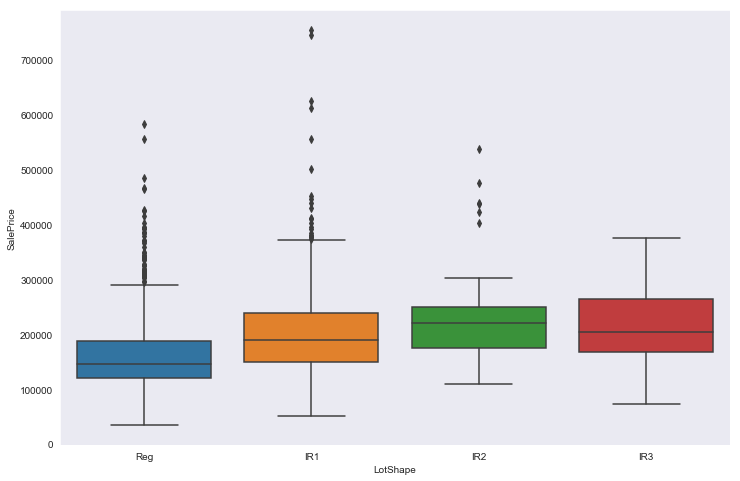

In [286]:
train['LotShape']
sns.boxplot(train['LotShape'], train['SalePrice'])

,MiscFeature,SalePrice


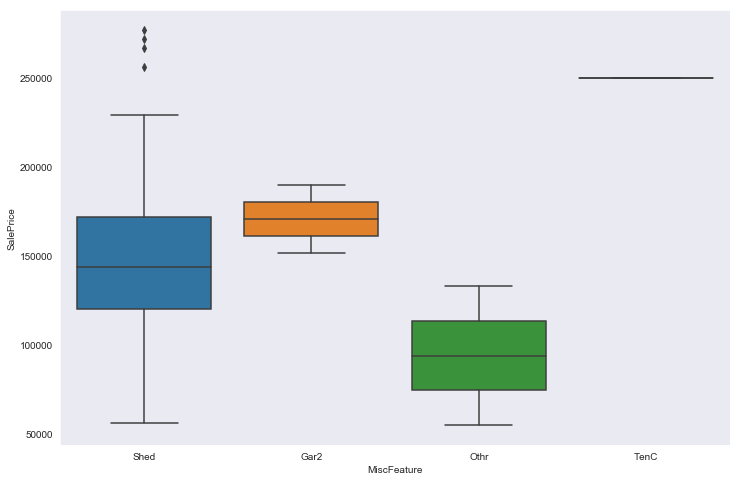

In [291]:
sns.boxplot(train['MiscFeature'], train['SalePrice'])
train[['MiscFeature','SalePrice']][train['MiscFeature'] == 'NA']

In [298]:
train['MiscFeature'].mode()[0]

'Shed'

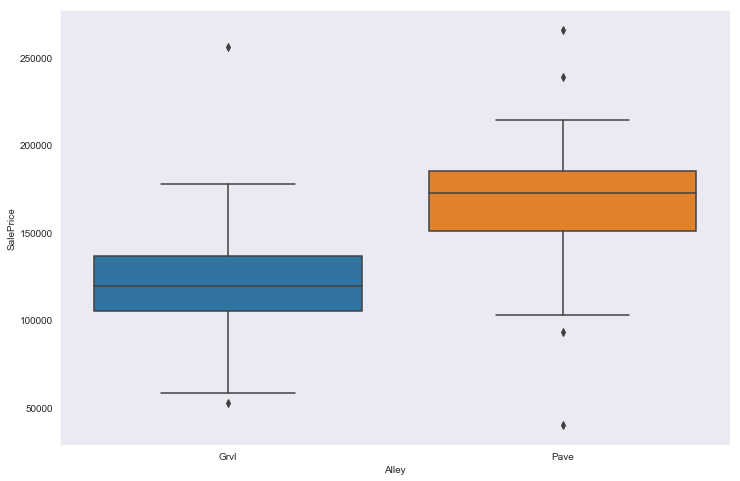

In [301]:
sns.boxplot(train['Alley'], train['SalePrice'])
train['Alley'].fillna('None')
# train[['Alley','SalePrice']][train['Alley'] == 'NA']
# train['Alley'].describe()
# train['Alley'].mode()[0]
# train['Alley']

In [296]:
train['Alley'].fillna('None')

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      Grvl
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
1430    None
1431    None
1432    Grvl
1433    None
1434    None
1435    None
1436    None
1437    None
1438    None
1439    None
1440    None
1441    None
1442    None
1443    None
1444    None
1445    None
1446    None
1447    None
1448    None
1449    None
1450    None
1451    None
1452    None
1453    None
1454    Pave
1455    None
1456    None
1457    None
1458    None
1459    None
Name: Alley, Length: 1460, dtype: object

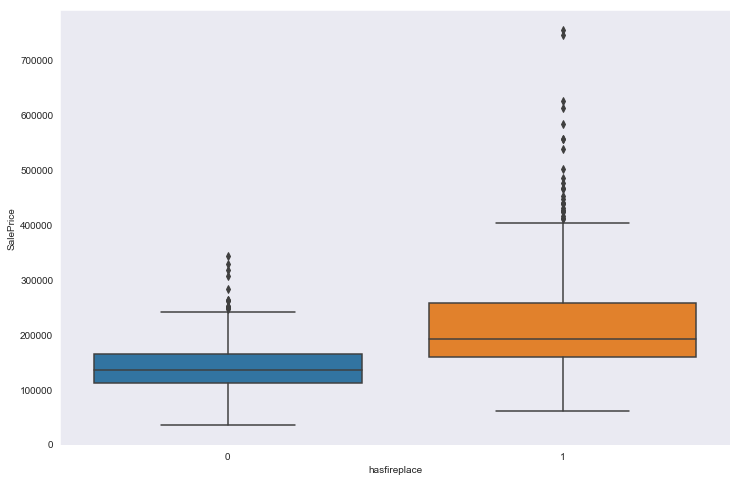

In [306]:
# sns.boxplot(train['Fence'], train['SalePrice'])
#sns.boxplot(train['FireplaceQu'], train['SalePrice'])
train['hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
sns.boxplot(train['hasfireplace'], train['SalePrice'])